In [93]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [94]:
df = pd.read_csv('matches_dataset_original.csv')

In [511]:
df.head()

,season_id,_id,_sid,_rcid,_tid,_utid,time,date,round,week,...,comment,status,tobeannounced,postponed,canceled,stadiumid,bestof,walkover,retired,disqualified
0,2797068,1358737318,1,1111,91071,31867,00:45,25/01/24,1,0,...,NaN,NaN,False,False,False,0,NaN,False,False,False
1,2797068,1358737319,1,1111,91071,31867,00:45,25/01/24,1,0,...,NaN,NaN,False,False,False,0,NaN,False,False,False
2,2797068,1358737320,1,1111,91071,31867,00:45,25/01/24,1,0,...,NaN,NaN,False,False,False,0,NaN,False,False,False
3,2797068,1358737321,1,1111,91071,31867,00:45,25/01/24,1,0,...,NaN,NaN,False,False,False,0,NaN,False,False,False
4,2797068,1358737322,1,1111,91071,31867,00:45,25/01/24,1,0,...,NaN,NaN,False,False,False,0,NaN,False,False,False


In [95]:
df['winner'].fillna('tie',inplace=True)

C:\Users\kash1\AppData\Local\Temp\ipykernel_27636\391742390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['winner'].fillna('tie',inplace=True)


In [97]:
def fun(data, team1, team2):
    # Filter data for the given teams
    data = data[((data['home_team'] == team1) | (data['away_team'] == team1)) |
                ((data['home_team'] == team2) | (data['away_team'] == team2))]
    data = data.drop_duplicates()

    X = data[['home_team', 'away_team']]
    y = data[['winner']]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Encode teams and winners
    team_encoder = LabelEncoder()
    winner_encoder = LabelEncoder()

    X_train['home_team'] = team_encoder.fit_transform(X_train['home_team'])
    X_test['home_team'] = team_encoder.transform(X_test['home_team'])
    X_train['away_team'] = team_encoder.transform(X_train['away_team'])
    X_test['away_team'] = team_encoder.transform(X_test['away_team'])
    
    y_train = winner_encoder.fit_transform(y_train.values.ravel())
    y_test = winner_encoder.transform(y_test.values.ravel())

    # Train RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    print("Classifier Accuracy:", accuracy_score(y_test, y_pred))

    team1_encoded = team_encoder.transform([team1])[0]
    team2_encoded = team_encoder.transform([team2])[0]

    y_pred_team = model.predict([[team1_encoded, team2_encoded]])
    return y_pred_team , data


In [541]:
data=df[['home_team','away_team','winner','home_score','away_score']]

In [542]:
data.head()

,home_team,away_team,winner,home_score,away_score
0,Burnley,Tottenham,away,0,1
1,London Guns,Bournemouth,home,1,0
2,Southampton,Wolverhampton,home,3,1
3,Chelsea,Manchester Reds,tie,1,1
4,Leicester,Manchester Blue,away,0,4


In [543]:
team1 = input()
team2 = input()

In [544]:
y_pred_team , data =fun(data,team1,team2)

Classifier Accuracy: 0.4413145539906103


c:\Users\kash1\PycharmProjects\gradio\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [545]:
if y_pred_team[0] == 0:
    print(team2)

elif y_pred_team[0] == 1:
    print(team1)

else:
    print('Match tied')

print(team1,team2)

Manchester Reds
Manchester Reds Manchester Blue


In [546]:
new_X = data[['winner']]
new_y = data[['home_score','away_score']]

In [547]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.33, random_state=42)

In [548]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [549]:
winner_encoder = LabelEncoder()

In [550]:
X_train['winner'] = winner_encoder.fit_transform(X_train['winner'])
X_test['winner'] = winner_encoder.transform(X_test['winner'])

In [551]:
home_model = RandomForestRegressor(random_state=42)

In [552]:
home_model.fit(X_train,y_train['home_score'])

RandomForestRegressor(random_state=42)

In [553]:
y_home=home_model.predict(X_test)

In [554]:
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error, root_mean_squared_error,r2_score

In [555]:
print("MSE:",mean_squared_error(y_test['home_score'], y_home))
print("RMSE:",root_mean_squared_error(y_test['home_score'], y_home))
print("R2s:",r2_score(y_test['home_score'], y_home))

MSE: 1.2682062726074148
RMSE: 1.1261466479137674
R2s: 0.5137323889065359


In [556]:
score_home = home_model.predict([y_pred_team])

c:\Users\kash1\PycharmProjects\gradio\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [557]:
away_model = RandomForestRegressor(random_state=42)

In [558]:
away_model.fit(X_train,y_train['away_score'])

RandomForestRegressor(random_state=42)

In [559]:
y_away = away_model.predict(X_test)

In [560]:
print("MSE:",mean_squared_error(y_test['away_score'], y_away))
print("RMSE:",root_mean_squared_error(y_test['away_score'], y_away))
print("R2s:",r2_score(y_test['away_score'], y_away))

MSE: 1.0523352132587138
RMSE: 1.025833911146787
R2s: 0.4805983867457073


In [561]:
score_away = away_model.predict([y_pred_team])

c:\Users\kash1\PycharmProjects\gradio\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [562]:
score_home = np.array(score_home, dtype = np.int64)
score_home

array([3])

In [563]:
score_away = np.array(score_away, dtype = np.int64)
score_away

array([0])

In [564]:
winning_goals = np.abs(np.subtract(score_home,score_away))[0]

In [565]:
int(winning_goals)

3

In [566]:
data

,home_team,away_team,winner,home_score,away_score
3,Chelsea,Manchester Reds,tie,1,1
4,Leicester,Manchester Blue,away,0,4
8,Manchester Reds,Watford,tie,2,2
13,Manchester Blue,Burnley,tie,1,1
18,West Ham,Manchester Reds,home,2,1
...,...,...,...,...,...
29277,Everton,Manchester Reds,home,4,3
29299,Manchester Blue,Crystal Palace,home,5,2
29624,Newcastle,Manchester Blue,home,3,1
29797,Burnley,Manchester Blue,home,3,1


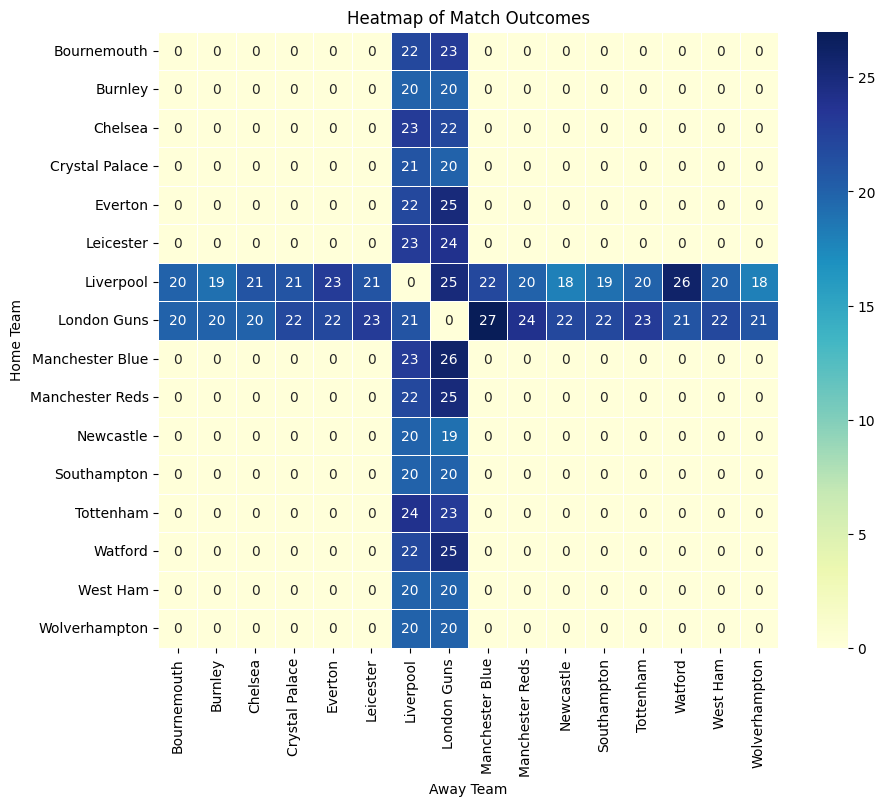

In [535]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame based on your data


# Create a pivot table to count the number of wins for each home vs away team
heatmap_data = pd.pivot_table(data, index='home_team', columns='away_team', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Match Outcomes')
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.show()


In [474]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


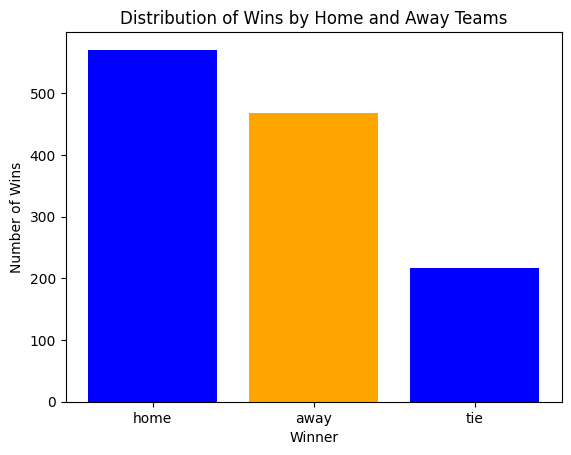

In [538]:
import pandas as pd
import matplotlib.pyplot as plt



# Count the number of wins by home and away
win_counts = data['winner'].value_counts()

# Plot the spectrum

plt.bar(win_counts.index, win_counts.values, color=['blue', 'orange'])
plt.title('Distribution of Wins by Home and Away Teams')
plt.xlabel('Winner')
plt.ylabel('Number of Wins')
plt.show()


In [540]:
data[(data['away_team']=='Liverpool') & (data['winner']=='away') & (data['home_team']=='Watford')].shape

(11, 5)

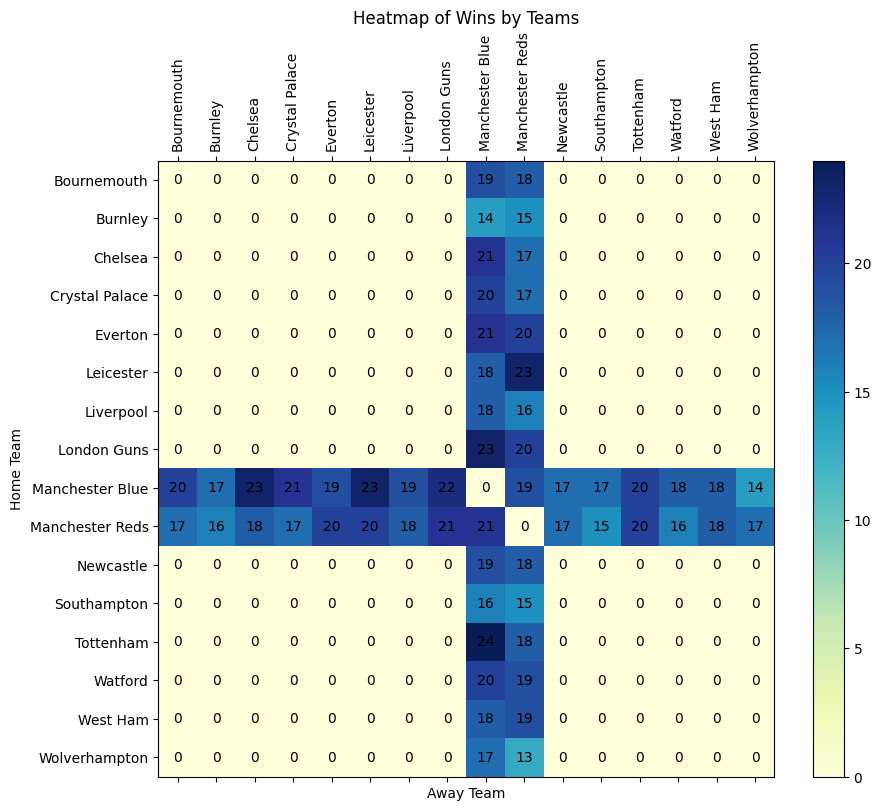

In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the original data is already loaded in 'data' DataFrame
# Sample DataFrame is commented out since it's assumed to be already present.

# Create a pivot table to count the number of wins for each home vs away team
home_wins = data[data['winner'] == 'home'].pivot_table(index='home_team', columns='away_team', aggfunc='size', fill_value=0)
away_wins = data[data['winner'] == 'away'].pivot_table(index='away_team', columns='home_team', aggfunc='size', fill_value=0)

# Combine home and away wins into a single DataFrame
combined_wins = home_wins.add(away_wins.transpose(), fill_value=0)

# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(combined_wins, cmap='YlGnBu')

# Add color bar
plt.colorbar(cax)

# Set the ticks and labels
ax.set_xticks(np.arange(combined_wins.shape[1]))
ax.set_yticks(np.arange(combined_wins.shape[0]))
ax.set_xticklabels(combined_wins.columns, rotation=90)
ax.set_yticklabels(combined_wins.index)

# Annotate each cell with the numeric value
for i in range(combined_wins.shape[0]):
    for j in range(combined_wins.shape[1]):
        ax.text(j, i, int(combined_wins.iloc[i, j]), ha='center', va='center', color='black')

# Set the labels and title
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.title('Heatmap of Wins by Teams')

plt.show()


In [571]:
df['home_team'].unique()

array(['Burnley', 'London Guns', 'Southampton', 'Chelsea', 'Leicester',
       'West Ham', 'Watford', 'Liverpool', 'Manchester Reds',
       'Crystal Palace', 'Wolverhampton', 'Tottenham', 'Newcastle',
       'Manchester Blue', 'Everton', 'Bournemouth'], dtype=object)